In [1]:
from datasets import load_dataset
import Preprocessor as p
import numpy as np
import nltk
import pandas as pd
from collections import Counter

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (2.0.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/home/oliver/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the copenlu/answerable_tydiqa dataset
dataset = load_dataset("copenlu/answerable_tydiqa")

train_df = dataset['train'].to_pandas()
train_df = train_df[train_df['language'].isin(['indonesian', 'arabic', 'bengali'])]
train_df = p.DataFramePreprocessor(train_df).df

val_df = dataset['validation'].to_pandas()
val_df = val_df[val_df['language'].isin(['indonesian', 'arabic', 'bengali'])]
val_df = p.DataFramePreprocessor(val_df).df

<Figure size 1500x800 with 0 Axes>

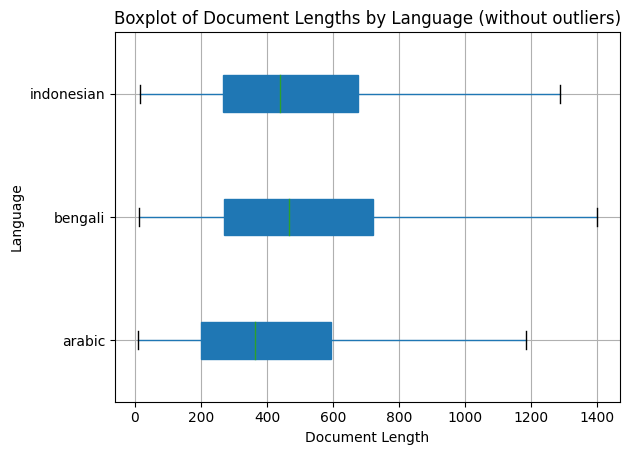

In [3]:
from matplotlib import pyplot as plt

data = train_df

data['document_length'] = data['document_plaintext'].str.len()

# Remove outliers (singular data points) by using the showfliers=False parameter in the boxplot function
plt.figure(figsize=(15, 8))
boxplot = data.boxplot(column='document_length', by='language', grid=True, patch_artist=True, vert=False, showfliers=False)

# Set the title and labels
plt.title('Boxplot of Document Lengths by Language (without outliers)')
plt.suptitle('')  # Suppress the default title
plt.ylabel('Language')
plt.xlabel('Document Length')
plt.tight_layout()
plt.savefig('boxplot_0.png')
plt.show()



<Figure size 1000x600 with 0 Axes>

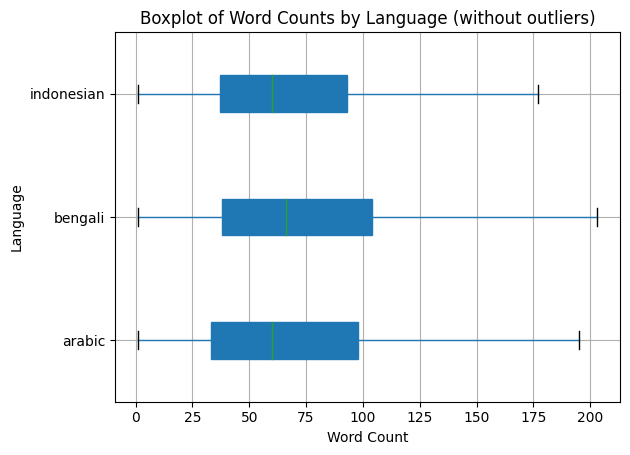

In [4]:
# Compute the number of words in 'document_plaintext' for each row
data['word_count'] = data['document_plaintext'].str.split().str.len()

# Boxplot of word counts by language
plt.figure(figsize=(10, 6))
boxplot = data.boxplot(column='word_count', by='language', grid=True, patch_artist=True, vert=False, showfliers=False)

# Set the title and labels
plt.title('Boxplot of Word Counts by Language (without outliers)')
plt.suptitle('')  # Suppress the default title
plt.ylabel('Language')
plt.xlabel('Word Count')
plt.tight_layout()
plt.savefig('boxplot_1.png')

plt.show()


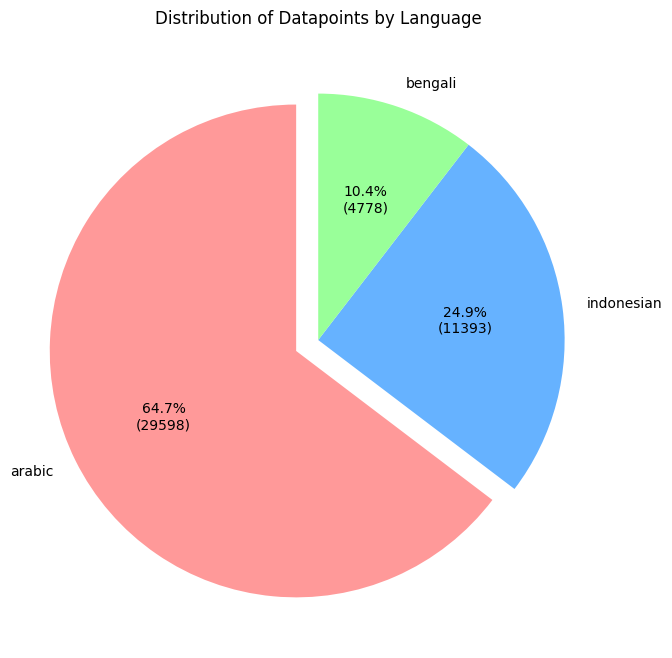

In [7]:
# Count the number of datapoints for each language
language_counts = data['language'].value_counts()

# Function to display both percentage and actual count
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.1f}%\n({absolute:d})"

# Create a pie chart of the distribution of datapoints by language with specific count for each language
plt.figure(figsize=(8, 8))
language_counts.plot.pie(autopct=lambda pct: func(pct, language_counts), 
                         startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99'], explode=(0.1, 0, 0))
plt.title('Distribution of Datapoints by Language')
plt.ylabel('')  # Remove the default ylabel
plt.savefig('pie.png')

plt.show()



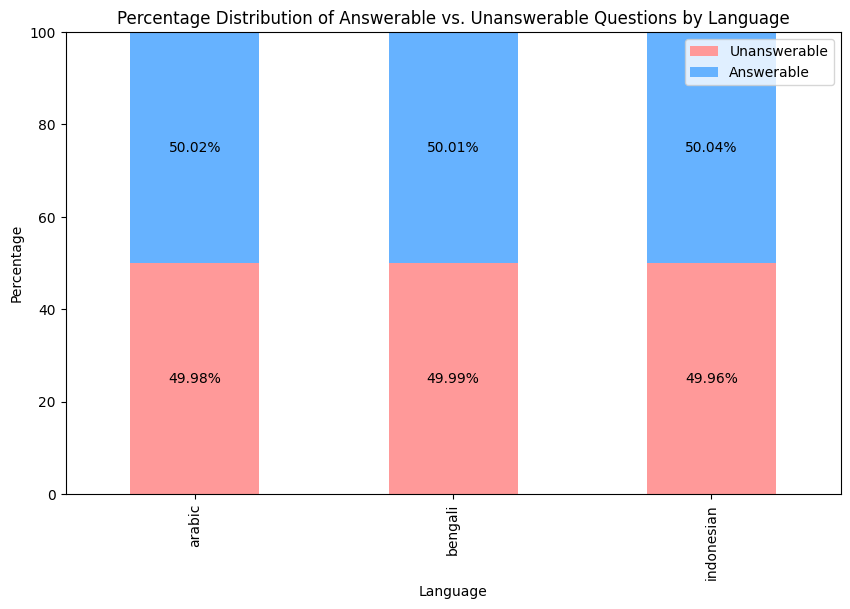

In [8]:

data['is_answerable'] = data['annotations'].apply(lambda x: x.get('answer_start', [-1])[0] != -1)

final_answerable_counts = data.groupby('language')['is_answerable'].value_counts().unstack().fillna(0)

final_answerable_percentage = (final_answerable_counts.T / final_answerable_counts.sum(axis=1)).T * 100

final_percentage_plot = final_answerable_percentage.plot.bar(stacked=True, figsize=(10, 6), color=['#FF9999', '#66B2FF'])
plt.title('Percentage Distribution of Answerable vs. Unanswerable Questions by Language')
plt.xlabel('Language')
plt.ylabel('Percentage')
plt.legend(['Unanswerable', 'Answerable'], loc='upper right')
plt.ylim(0, 100)  # Set y-axis limits to 0-100 for clarity

for p in final_percentage_plot.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 5:  # Only annotate if the height is large enough to be visible
        final_percentage_plot.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')
plt.savefig('distributions.png')
plt.show()



In [9]:
(final_answerable_counts.T / final_answerable_counts.sum(axis=1)).T * 100

is_answerable,False,True
language,,
arabic,49.979728,50.020272
bengali,49.989538,50.010462
indonesian,49.956117,50.043883


In [74]:
bengali

,question_text,document_title,language,annotations,document_plaintext,document_url,tokens,document_length,word_count,is_answerable
3,চেঙ্গিস খান কোন বংশের রাজা ছিলেন ?,চেঙ্গিজ খান,bengali,"{'answer_start': [414], 'answer_text': ['বোরজি...",চেঙ্গিজ খান (মঙ্গোলীয়: Чингис Хаан আ-ধ্ব-ব: ...,https://bn.wikipedia.org/wiki/%E0%A6%9A%E0%A7%...,"[চেঙ্গিজ, খান, মঙ্গোলীয়, чингис, хаан, আ-ধ্ব-...",894,130,True
22,অপারেশন জ্যাকপটের কর্নেল কে ছিলেন ?,অপারেশন জ্যাকপট,bengali,"{'answer_start': [153], 'answer_text': ['ওসমান...",তারপর উক্ত ৮জনের সাথে আরো কয়েকজনকে একত্র করে ...,https://bn.wikipedia.org/wiki/%E0%A6%85%E0%A6%...,"[উক্ত, ৮জনের, সাথে, আরো, কয়েকজনকে, একত্র, ২০,...",226,39,True
31,কত সালে সর্বভারতীয় তৃণমূল কংগ্রেসের প্রতিষ্ঠা...,সর্বভারতীয় তৃণমূল কংগ্রেস,bengali,"{'answer_start': [114], 'answer_text': ['১৯৯৮']}",সর্বভারতীয় তৃণমূল কংগ্রেস (সংক্ষেপে তৃণমূল কং...,https://bn.wikipedia.org/wiki/%E0%A6%B8%E0%A6%...,"[সর্বভারতীয়, তৃণমূল, কংগ্রেস, সংক্ষেপে, তৃণমূ...",255,34,True
115,কত সালে কম্পিউটার আবিষ্কার করা হয় ?,কম্পিউটার,bengali,"{'answer_start': [365], 'answer_text': ['খ্রিষ...",প্রাগৈতিহাসিক যুগে গণনার যন্ত্র উদ্ভাবিত বিভিন...,https://bn.wikipedia.org/wiki/%E0%A6%95%E0%A6%...,"[প্রাগৈতিহাসিক, যুগে, গণনার, যন্ত্র, উদ্ভাবিত,...",545,79,True
126,মোহনদাস করমচাঁদ গান্ধী বা মহাত্মা গান্ধীর জন্ম...,মোহনদাস করমচাঁদ গান্ধী,bengali,"{'answer_start': [33], 'answer_text': ['পোরবন্...",মোহনদাস করমচাঁদ গান্ধী ১৮৬৯ সালে পোরবন্দরের হি...,https://bn.wikipedia.org/wiki/%E0%A6%AE%E0%A7%...,"[মোহনদাস, করমচাঁদ, গান্ধী, ১৮৬৯, সালে, পোরবন্দ...",685,99,True
...,...,...,...,...,...,...,...,...,...,...
115947,মুহাম্মাদ মুরসি ইসা আল-আইয়াত কবে জন্মগ্রহণ কর...,মুহাম্মাদ মুরসি,bengali,"{'answer_start': [-1], 'answer_text': ['']}",২০০০ সালে মুহাম্মাদ মুরসি সংসদ সদস্য নির্বাচিত...,https://bn.wikipedia.org/wiki/%E0%A6%AE%E0%A7%...,"[২০০০, সালে, মুহাম্মাদ, মুরসি, সংসদ, সদস্য, নি...",508,69,False
115966,নবী হযরত মুহাম্মদের জন্ম কবে হয় ?,মুহাম্মাদ,bengali,"{'answer_start': [-1], 'answer_text': ['']}",ইসলামী ভাষ্যমতে মুহাম্মাদ (সঃ) এক রাতে মক্কায়...,https://bn.wikipedia.org/wiki/%E0%A6%AE%E0%A7%...,"[ইসলামী, ভাষ্যমতে, মুহাম্মাদ, সঃ, এক, রাতে, মক...",831,122,False
115986,"বেনজামিন এডয়ার্ড মিয়েরা ""বেন"" স্টিলার কোন চল...",বেন স্টিলার,bengali,"{'answer_start': [-1], 'answer_text': ['']}",২০০২ সালে প্রকাশিত জন ব্যাঙ্কস্টোন এর ‘বেন স্ট...,https://bn.wikipedia.org/wiki/%E0%A6%AC%E0%A7%...,"[২০০২, সালে, প্রকাশিত, ব্যাঙ্কস্টোন, ‘বেন, স্ট...",168,28,False
116015,জামাতি ইসলাম দলটির প্রতিষ্ঠাতা কে ?,জামায়াতে ইসলামী,bengali,"{'answer_start': [-1], 'answer_text': ['']}","জামায়াতে ইসলামী পাকিস্তান,\nজামায়াতে ইসলামী ...",https://bn.wikipedia.org/wiki/%E0%A6%9C%E0%A6%...,"[জামায়াতে, ইসলামী, পাকিস্তান, জামায়াতে, ইসলা...",242,32,False


Unique questions:
Series([], Name: question_text, dtype: object)


In [81]:
arabic

,question_text,document_title,language,annotations,document_plaintext,document_url,tokens,document_length,word_count,is_answerable


In [66]:
duplicate_questions = bengali.duplicated(subset='question_text', keep=False)
print("Unique questions:")
print(bengali['question_text'].drop_duplicates())

Unique questions:
3                       চেঙ্গিস খান কোন বংশের রাজা ছিলেন ?
22                     অপারেশন জ্যাকপটের কর্নেল কে ছিলেন ?
31       কত সালে সর্বভারতীয় তৃণমূল কংগ্রেসের প্রতিষ্ঠা...
115                    কত সালে কম্পিউটার আবিষ্কার করা হয় ?
126      মোহনদাস করমচাঁদ গান্ধী বা মহাত্মা গান্ধীর জন্ম...
                               ...                        
57938    মুহাম্মাদ মুরসি ইসা আল-আইয়াত কবে জন্মগ্রহণ কর...
57957                    নবী হযরত মুহাম্মদের জন্ম কবে হয় ?
57977    বেনজামিন এডয়ার্ড মিয়েরা "বেন" স্টিলার কোন চল...
58007                  জামাতি ইসলাম দলটির প্রতিষ্ঠাতা কে ?
58056                 বাংলা ব্যাকরণ মতে বিশেষণ কয় প্রকার ?
Name: question_text, Length: 2376, dtype: object


In [67]:

duplicate_questions = indonesian.duplicated(subset='question_text', keep=False)
print("Unique questions:")
print(indonesian['question_text'].drop_duplicates())

Unique questions:
7        dimanakah  Dr. Ernest François Eugène Douwes D...
11                         Siapa arsitek Balai Kota Seoul?
27                             Kapan PBB mulai terbentuk ?
39                         Dimana James Hepburn meninggal?
54                       Dimana Jamie Richard Vardy lahir?
                               ...                        
58016                  Siapa yang menyusun tabel periodik?
58026                         apakah nama ibukota Bosnia ?
58030             Kapan PT Kereta api Indonesia  berdiri ?
58045                 Dari manakah asal dunia persilatan ?
58054             Kapan Kaisar Tang Gaozu mulai menjabat ?
Name: question_text, Length: 5702, dtype: object


In [89]:
bengali = data[data['language'] == 'bengali']
indonesian = data[data['language'] == 'indonesian']
arabic = data[data['language']== 'arabic']



In [145]:
bengali.iloc[22]

question_text         ক্যাপ্টেন ডাক্তার লক্ষ্মী সেহগল কত সালে ভারতের...
document_title                                            লক্ষ্মী সেহগল
language                                                        bengali
annotations             {'answer_start': [25], 'answer_text': ['১৯৪৩']}
document_plaintext    সুভাষচন্দ্র বসু ২ জুলাই, ১৯৪৩ সালে সিঙ্গাপুর গ...
document_url          https://bn.wikipedia.org/wiki/%E0%A6%B2%E0%A6%...
tokens                [সুভাষচন্দ্র, বসু, ২, জুলাই, ১৯৪৩, সালে, সিঙ্গ...
document_length                                                     503
word_count                                                           73
is_answerable                                                      True
Name: 399, dtype: object

In [2]:
for i in bengali_duplicates:
    #print(bengali['question_text'][i[0]] == bengali['question_text'][i[1]])
    print(bengali['is_answerable'][i[0]], bengali['is_answerable'][i[1]])

In [128]:

def find_exact_duplicates(df, column_name):
    # Find exact duplicates and their positions
    duplicates_with_positions = []
    total_duplicates = 0
    for index, question in enumerate(df[column_name]):
        if df[column_name].duplicated(keep=False).iloc[index] and df[column_name].duplicated(keep=False).sum() > 1:
            original_indices = df[df[column_name] == question].index.tolist()
            duplicate_indices = [i for i in original_indices if i != index]
            duplicates_with_positions.append((original_indices, duplicate_indices, question))
            total_duplicates += len(duplicate_indices)
    
    return duplicates_with_positions, total_duplicates

# Example usage
bengali_duplicates, total_bengali_duplicates = find_exact_duplicates(bengali, 'question_text')
print("Exact Duplicates and their positions:")
for original_indices, duplicate_indices, question in bengali_duplicates:
    print(f"Original Indices: {original_indices}, Duplicate Indices: {duplicate_indices}, Question: {question}")
print(f"Total Number of Duplicates: {total_bengali_duplicates}")


Exact Duplicates and their positions:
Original Indices: [3, 58062], Duplicate Indices: [3, 58062], Question: চেঙ্গিস খান কোন বংশের রাজা ছিলেন ?
Original Indices: [22, 58081], Duplicate Indices: [22, 58081], Question: অপারেশন জ্যাকপটের কর্নেল কে ছিলেন ?
Original Indices: [31, 58090], Duplicate Indices: [31, 58090], Question: কত সালে সর্বভারতীয় তৃণমূল কংগ্রেসের প্রতিষ্ঠা হয় ?
Original Indices: [115, 58173], Duplicate Indices: [115, 58173], Question: কত সালে কম্পিউটার আবিষ্কার করা হয় ?
Original Indices: [126, 58184], Duplicate Indices: [126, 58184], Question: মোহনদাস করমচাঁদ গান্ধী বা মহাত্মা গান্ধীর জন্ম ভারতবর্ষের কোথায় হয় ?
Original Indices: [146, 58204], Duplicate Indices: [146, 58204], Question: রামকৃষ্ণ পরমহংসের জন্ম কবে হয় ?
Original Indices: [163, 58221], Duplicate Indices: [163, 58221], Question: জাতিসংঘ শান্তিরক্ষা মিশন প্রথম কোথায় শুরু হয় ?
Original Indices: [178, 58236], Duplicate Indices: [178, 58236], Question: ভারতীয় লেখক আর. কে. নারায়ণ কবে জন্মগ্রহণ করেন ?
Original Indi

In [134]:
# Example usage
arabic_duplicates, total_arabic_duplicates = find_exact_duplicates(arabic, 'question_text')
print("Exact Duplicates and their positions:")
for original_indices, duplicate_indices, question in arabic_duplicates:
    print(f"Original Indices: {original_indices}, Duplicate Indices: {duplicate_indices}, Question: {question}")
print(f"Total Number of Duplicates: {total_bengali_duplicates}")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [135]:
# Example usage
indonesian_duplicates, total_indonesian_duplicates = find_exact_duplicates(indonesian, 'question_text')
print("Exact Duplicates and their positions:")
for original_indices, duplicate_indices, question in arabic_duplicates:
    print(f"Original Indices: {original_indices}, Duplicate Indices: {duplicate_indices}, Question: {question}")
print(f"Total Number of Duplicates: {total_bengali_duplicates}")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:

def get_word_counts(df, row_name):
    tokens = df[row_name].str.split()
    flat_tokens = [word for sublist in tokens for word in sublist if word not in ["?", "؟"]]
    word_counts = Counter(flat_tokens)
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return sorted_words[:5]




docs_beng = get_word_counts(bengali, 'document_plaintext')
qs_beng = get_word_counts(bengali, 'question_text')

docs_ind = get_word_counts(indonesian,'document_plaintext')
qs_ind = get_word_counts(indonesian, 'question_text')

docs_ar = get_word_counts(arabic,'document_plaintext')
qs_ar = get_word_counts(arabic, 'question_text')


In [40]:
bengali documents :  [('ও', 5170), ('এবং', 5098), ('এই', 3344), ('তিনি', 2902), ('থেকে', 2455)]
bengali questions : [('কী', 940), ('নাম', 837), ('কত', 802), ('হয়', 800), ('কোন', 764)]
    
    
Indonesian questions:  [('yang', 1814), ('Kapan', 1811), ('Apa', 1633), ('Apakah', 1227), ('pertama', 1078)]
Indonesian docs: [('yang', 23886), ('dan', 23677), ('di', 16530), ('dari', 9711), ('dengan', 9052)]

Arabic questions:  [('ما', 7445), ('متى', 7130), ('هو', 6758), ('من', 6305), ('في', 4144)]
Arabic docs:  [('في', 89425), ('من', 61371), ('على', 27931), ('إلى', 22046), ('عام', 13393)]) 


SyntaxError: invalid syntax (3842907230.py, line 1)

In [ ]:
bengali questions : [('কী', 940), ('নাম', 837), ('কত', 802), ('হয়', 800), ('কোন', 764)]


Indonesian questions:  [('yang', 1814), ('Kapan', 1811), ('Apa', 1633), ('Apakah', 1227), ('pertama', 1078)]

Arabic questions:  [('ما', 7445), ('متى', 7130), ('هو', 6758), ('من', 6305), ('في', 4144)]



findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not

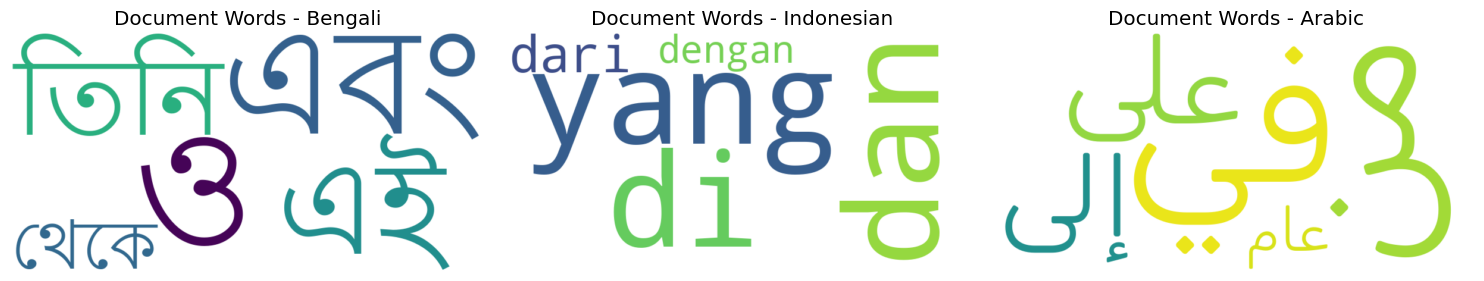

In [52]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Data
languages = ['Bengali', 'Indonesian', 'Arabic']
document_word_counts = [
    [('ও', 5170), ('এবং', 5098), ('এই', 3344), ('তিনি', 2902), ('থেকে', 2455)],
    [('yang', 23886), ('dan', 23677), ('di', 16530), ('dari', 9711), ('dengan', 9052)],
    [('في', 89425), ('من', 61371), ('على', 27931), ('إلى', 22046), ('عام', 13393)]
]



# Font paths for specific languages
font_paths = {
    'Bengali': '/usr/share/fonts/truetype/lohit-bengali/Lohit-Bengali.ttf',  # Replace with the path to a Bengali font file (.ttf)
    'Arabic': '/usr/share/fonts/truetype/Rubik/Rubik-Italic-VariableFont_wght.ttf'  # Replace with the path to an Arabic font file (.ttf)
}

# Generate word clouds and display side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    language = languages[i]
    font_path = font_paths.get(language, None)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, relative_scaling=0).generate_from_frequencies(dict(document_word_counts[i]))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Document Words - {language}')

plt.tight_layout()
plt.savefig('document_wordcloud.png')
plt.show()



findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not found.
findfont: Font family 'SimSun' not

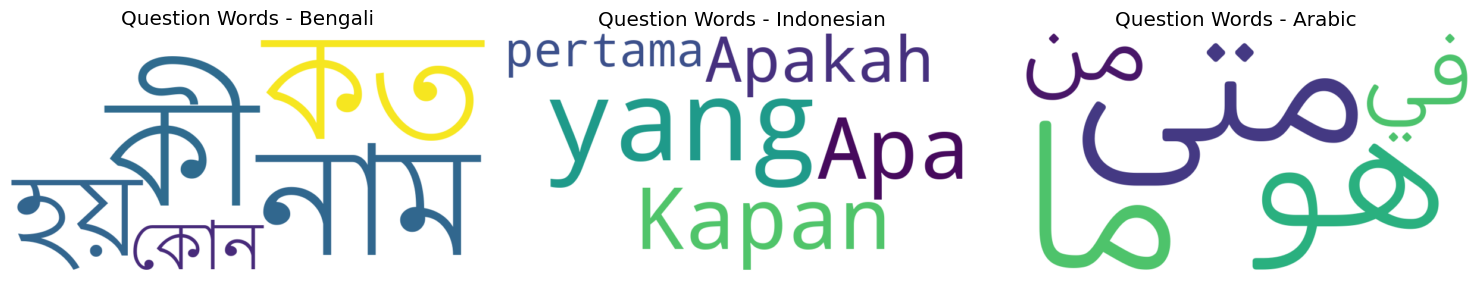

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Data
languages = ['Bengali', 'Indonesian', 'Arabic']
question_word_counts = [
    [('কী', 940), ('নাম', 837), ('কত', 802), ('হয়', 800), ('কোন', 764)],
    [('yang', 1814), ('Kapan', 1811), ('Apa', 1633), ('Apakah', 1227), ('pertama', 1078)],
    [('ما', 7445), ('متى', 7130), ('هو', 6758), ('من', 6305), ('في', 4144)]
]

# Font paths for specific languages
font_paths = {
    'Bengali': '/usr/share/fonts/truetype/lohit-bengali/Lohit-Bengali.ttf',  # Replace with the path to a Bengali font file (.ttf)
    'Arabic': '/usr/share/fonts/truetype/Rubik/Rubik-Italic-VariableFont_wght.ttf'  # Replace with the path to an Arabic font file (.ttf)
}


# Generate word clouds and display side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, ax in enumerate(axes):
    language = languages[i]
    font_path = font_paths.get(language, None)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path, relative_scaling=0).generate_from_frequencies(dict(question_word_counts[i]))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Question Words - {language}')

plt.tight_layout()
plt.savefig('question_wordcloud.png')
plt.show()


In [45]:
from matplotlib import font_manager
print("List of all fonts currently available in the matplotlib:")
print(*font_manager.findSystemFonts(fontpaths=None, fontext='ttf'), sep=" \n")

List of all fonts currently available in the matplotlib:
/usr/share/fonts/truetype/lohit-malayalam/Lohit-Malayalam.ttf 
/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf 
/usr/share/fonts/truetype/tlwg/Garuda-Oblique.ttf 
/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf 
/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf 
/usr/share/fonts/truetype/dejavu/DejaVuSans-BoldOblique.ttf 
/usr/share/fonts/truetype/tlwg/Sawasdee.ttf 
/usr/share/fonts/truetype/malayalam/Meera-Regular.ttf 
/usr/share/fonts/truetype/Nakula/nakula.ttf 
/usr/share/fonts/truetype/tlwg/Loma-BoldOblique.ttf 
/usr/share/fonts/truetype/samyak-fonts/Samyak-Gujarati.ttf 
/usr/share/fonts/truetype/Sarai/Sarai.ttf 
/usr/share/fonts/truetype/fonts-yrsa-rasa/Rasa-Bold.ttf 
/usr/share/fonts/truetype/dejavu/DejaVuMathTeXGyre.ttf 
/usr/share/fonts/truetype/tlwg/Norasi-BoldOblique.ttf 
/usr/share/fonts/truetype/tlwg/Norasi-Italic.ttf 
/usr/share/fonts/truetype/ubuntu/Ubuntu-LI.ttf 
/usr/share/f

qs =  what, name, how many, is
docs = and, and/also,this, he, from

In [ ]:
print("most common words in questions, Bengali: ", qs_beng)
print("most common words in docs, Bengali", docs_beng)

qs = which,When, What, Whether
docs = which, and, in, of, with

In [ ]:
print("most common words in questions, Indonesian: ", qs_ind)
print("most common words in docs, Indonesian", docs_ind)

qs = Who, is, what, when 
docs = from, on, to, general


In [ ]:
print("most common words in questions, Arabic: ", qs_ar)
print("most common words in docs, Arabic", docs_ar)

In [ ]:
def oracle_eval(row):
    answer = row['annotations']['answer_text'][0]
    return bool(answer) and answer in row['document_plaintext']

def rule_based_classifier(row, threshold=0.5):
    ## count how many words in the question appear in the document
    question_words = row['question_text'].split()
    document_words = row['document_plaintext'].split()
    count = 0
    for word in question_words:
        if word in document_words:
            count += 1
    count = count / len(question_words)
    if count >= threshold:
        return True
    else:
        return False
            

In [ ]:
## make a linear list from 0.05 to 0.95 with 0.05 increments
thresholds = [i/100 for i in range(5, 100)]

In [ ]:
scores = []

for thresh in [i/100 for i in range(5, 100)]:
    count = 0
    for row in train_df.iterrows():
        if rule_based_classifier(row[1], thresh) == oracle_eval(row[1]):
            count += 1
    print("Score for threshold", thresh, "is", count/len(train_df))
    scores.append([thresh, count/len(val_df)])

In [ ]:
count = 0
for row in val_df.iterrows():
    if rule_based_classifier(row[1], 0.25) == oracle_eval(row[1]):
        count += 1

In [ ]:
# Count the number of datapoints for each language
language_counts = data['language'].value_counts()

# Function to display both percentage and actual count
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return f"{pct:.1f}%\n({absolute:d})"

# Create a pie chart of the distribution of datapoints by language with specific count for each language
plt.figure(figsize=(8, 8))
language_counts.plot.pie(autopct=lambda pct: func(pct, language_counts), 
                         startangle=90, colors=['#FF9999', '#66B2FF', '#99FF99'], explode=(0.1, 0, 0))
plt.title('Distribution of Datapoints by Language')
plt.ylabel('')  # Remove the default ylabel
plt.savefig('pie.png')

plt.show()



In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Data
languages = ['Bengali', 'Indonesian', 'Arabic']
document_words = [
    'ও এবং এই তিনি থেকে',
    'yang dan di dari dengan',
    'في من على إلى عام'
]

# Generate word clouds
for i, language in enumerate(languages):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(document_words[i])
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Document Words - {language}')
    plt.show()
